In [6]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import re
from scipy import stats

In [7]:
import pandas as pd

# Fase 1

## Análisis Descriptivo y Versionado Inicial de Datos

### Verificación de dimensiones y valores faltantes

In [8]:
import os


df_unificado = pd.read_csv(os.path.join("..", "data", "dataset_unificado.csv"), index_col=0)

In [9]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1214 entries, 0 to 1213
Columns: 214 entries, dia to HORA
dtypes: float64(211), object(3)
memory usage: 2.0+ MB


In [10]:
df_unificado['Frio (Kw)__Consolidado EE'].describe()

count    1.213000e+03
mean     2.827299e+04
std      1.595166e+05
min      2.310000e+03
25%      1.799700e+04
50%      2.385900e+04
75%      2.936100e+04
max      5.572801e+06
Name: Frio (Kw)__Consolidado EE, dtype: float64

In [11]:
df_unificado.describe()

,Meta EE Eflu__Consolidado KPI,CO 2 linea 2 / Hl__Consolidado KPI,Unnamed: 123__Consolidado KPI,ET Servicios / Hl__Consolidado KPI,ET Elab/Hl__Consolidado KPI,Meta EE Caldera__Consolidado KPI,Agua Paste L3 / Hl__Consolidado KPI,Meta EE Sala Maq__Consolidado KPI,Agua Bodega / Hl__Consolidado KPI,Agua Cocina / Hl__Consolidado KPI,...,Aire Elaboracion (m3)__Consolidado Aire,Aire Envasado (M3)__Consolidado Aire,Totalizador_Aire_Cocina__Consolidado Aire,Totalizador_Aire_L3__Consolidado Aire,Totalizador_Aire_Bodega__Consolidado Aire,Aire Producido (M3)__Consolidado Aire,Totalizador_Aire_L2__Consolidado Aire,Totaliador_Aire_L4__Consolidado Aire,Aire Servicios (M3)__Consolidado Aire,Totalizador_Aire_L5__Consolidado Aire
count,848.000000,848.000000,0.0,1213.000000,1213.000000,848.000000,848.000000,848.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.101279,0.608039,NaN,8.857736,26.196404,0.101279,0.978830,4.355000,1.200602,1.553155,...,26469.130482,13934.289518,5215.254173,4989.427632,18340.113982,53210.530091,4816.772733,2775.284475,12807.110091,1352.804678
std,0.010897,0.877294,NaN,18.923063,36.009727,0.010897,8.830705,0.468555,2.879552,1.158995,...,11825.998114,5990.144145,1522.657024,2548.627554,3920.924808,10927.076341,2968.455956,1346.517199,12013.938326,1368.137755
min,0.087143,0.000000,NaN,0.000000,0.164008,0.087143,-0.018261,3.747143,0.294227,0.000000,...,8651.380000,4.500000,0.000000,0.000000,5871.130000,7267.000000,0.000000,0.000000,-148994.360000,0.000000
25%,0.091429,0.000000,NaN,3.312804,15.767424,0.091429,0.000000,3.931429,0.706168,1.375401,...,21516.780000,9828.890000,4363.360000,2870.500000,16063.470000,46650.000000,2122.850000,2633.000000,9424.270000,143.910000
50%,0.098571,0.000000,NaN,5.026632,20.599145,0.098571,0.000000,4.238571,0.876086,1.448130,...,25455.350000,14919.710000,5499.440000,6230.340000,18559.970000,54550.000000,5393.940000,3207.780000,13844.990000,769.440000
75%,0.111429,1.071949,NaN,8.277658,27.912802,0.111429,0.099644,4.791429,1.167600,1.532131,...,29756.420000,18914.260000,6176.810000,7012.280000,21100.560000,61546.000000,7505.310000,3633.140000,18039.120000,2575.050000
max,0.124143,5.105263,NaN,372.970758,1043.384593,0.124143,131.700000,5.338143,93.785714,24.874603,...,179673.930000,25706.660000,8032.250000,8094.190000,31508.880000,85740.000000,11039.000000,6012.500000,36442.710000,5049.970000


In [12]:
df_unificado

,dia,Meta EE Eflu__Consolidado KPI,CO 2 linea 2 / Hl__Consolidado KPI,Unnamed: 123__Consolidado KPI,ET Servicios / Hl__Consolidado KPI,ET Elab/Hl__Consolidado KPI,Meta EE Caldera__Consolidado KPI,Agua Paste L3 / Hl__Consolidado KPI,Meta EE Sala Maq__Consolidado KPI,Agua Bodega / Hl__Consolidado KPI,...,Aire Envasado (M3)__Consolidado Aire,Totalizador_Aire_Cocina__Consolidado Aire,Totalizador_Aire_L3__Consolidado Aire,Totalizador_Aire_Bodega__Consolidado Aire,Aire Producido (M3)__Consolidado Aire,Totalizador_Aire_L2__Consolidado Aire,Totaliador_Aire_L4__Consolidado Aire,Aire Servicios (M3)__Consolidado Aire,Totalizador_Aire_L5__Consolidado Aire,HORA
0,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-01,NaN,NaN,NaN,5.547366,17.419777,NaN,NaN,NaN,1.418025,...,13338.300000,6905.00000,7356.390,22892.7700,51079.0,2862.1200,3040.400000,5617.330000,79.390000,2025-11-06 23:59:00
2,2020-07-02,NaN,NaN,NaN,5.547366,17.419777,NaN,NaN,NaN,1.418025,...,13338.300000,6905.00000,7356.390,22892.7700,51079.0,2862.1200,3040.400000,5617.330000,79.390000,2025-11-06 23:59:00
3,2020-07-03,NaN,NaN,NaN,4.936588,20.504276,NaN,NaN,NaN,1.152139,...,12754.620000,7241.98000,7452.000,25532.2500,62958.0,2020.5600,3151.290000,13565.950000,130.770000,2025-11-06 23:59:00
4,2020-07-04,NaN,NaN,NaN,3.659745,17.832753,NaN,NaN,NaN,0.569047,...,20443.640000,7568.53000,7716.010,24355.2700,69435.0,7327.0000,3047.810000,10805.160000,2352.820000,2025-11-06 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,2023-10-22,0.102857,1.089117,NaN,4.415986,55.648006,0.102857,0.0,4.422857,0.331436,...,6064.859375,2939.12500,68.625,7086.3125,26134.0,5989.6250,0.000000,9558.281250,6.609375,2025-11-06 23:59:00
1210,2023-10-23,0.102857,1.356923,NaN,130.383609,155.282003,0.102857,0.0,4.422857,3.643109,...,6851.625000,2228.25000,9.125,6964.3750,22882.0,6835.6875,1.109375,6702.640625,5.703125,2025-11-06 23:59:00
1211,2023-10-24,0.102857,0.796247,NaN,51.759707,65.535237,0.102857,0.0,4.422857,5.309400,...,6664.765625,2277.96875,70.625,7709.0625,21880.0,6593.4375,0.000000,5228.203125,0.703125,2025-11-06 23:59:00
1212,2023-10-25,0.102857,0.487776,NaN,27.194143,30.369692,0.102857,0.0,4.422857,3.628069,...,8678.515625,2327.12500,5.750,6522.3750,23099.0,8671.3125,1.453125,5552.742188,0.000000,2025-11-06 23:59:00


In [13]:
df_unificado.isna().sum().sort_values(ascending=False).head(119)

Unnamed: 123__Consolidado KPI        1214
Unnamed: 124__Consolidado KPI        1214
Unnamed: 67__Consolidado KPI         1214
Unnamed: 46__Consolidado KPI         1214
Unnamed: 103__Consolidado KPI        1214
                                     ... 
ET Linea 3/Hl__Consolidado KPI          1
Agua Bodega / Hl__Consolidado KPI       1
EE Linea 2 / Hl__Consolidado KPI        1
Agua Linea 4/Hl__Consolidado KPI        1
Agua Cocina / Hl__Consolidado KPI       1
Length: 119, dtype: int64

In [14]:
na_counts = df_unificado.isna().sum()
vars_300 = na_counts[na_counts >= 300].index.tolist()
df_unificado = df_unificado.drop(columns=vars_300, errors="ignore")

In [15]:
# Cuenta ceros
zero_counts = (df_unificado.eq(0) | df_unificado.eq("0")).sum(axis=0)
zero_ratio  = ((zero_counts / len(df_unificado)) * 100).sort_values(ascending=False)

umbral = 50.0
muchos_ceros = zero_ratio[zero_ratio >= umbral]

print("\nColumnas con ≥", umbral, "% ceros:", len(muchos_ceros), 'de', len(df_unificado.columns), "columnas totales")
print()
print(muchos_ceros.apply(lambda x: f"{x:.2f}%"))


Columnas con ≥ 50.0 % ceros: 1 de 117 columnas totales

FC Lavadora L2__Consolidado Agua    85.01%
dtype: object


In [16]:
cols_muchos_ceros = muchos_ceros.index.tolist()
df_unificado = df_unificado.drop(columns=cols_muchos_ceros, errors="ignore")

### Detección de valores atípicos

Detectamos outliers con el método de rango interquarlitico y aplicamos imputación por kNN a outliers y nulos

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# (Asumo que 'df_unificado' ya está cargado)

# --- 0) PREPARACIÓN DE LA COLUMNA DE TIEMPO (¡Sin tocar el índice!) ---
# Convertir la columna 'dia' a formato datetime
df_unificado['dia'] = pd.to_datetime(df_unificado['dia'])

# Asegurarse de que esté ordenado cronológicamente por la columna 'dia'
# ¡IMPORTANTE! Usamos reset_index(drop=True) para re-generar el índice (0, 1, 2...)
# Esto es vital para que la imputación KNN funcione correctamente después.
df_unificado = df_unificado.sort_values(by='dia').reset_index(drop=True)

# Obtener columnas numéricas
# (Nos aseguramos de que 'dia' no esté, aunque to_datetime la saca de 'number')
num_cols = df_unificado.select_dtypes(include=[np.number]).columns


# --- 1) DIVISIÓN DE DATOS (Usando la columna 'dia') ---
# Todo lo anterior a 2023 es entrenamiento
# Usamos .loc con la condición booleana sobre la columna 'dia'
df_train = df_unificado.loc[df_unificado['dia'] < '2023-01-01'].copy()
# Todo 2023 (y en adelante) es test
df_test = df_unificado.loc[df_unificado['dia'] >= '2023-01-01'].copy()

print(f"Tamaño Train: {df_train.shape}")
print(f"Tamaño Test:  {df_test.shape}")


# --- 2) TRATAMIENTO DE OUTLIERS (Sin Data Leakage) ---
# (Este código no cambia, ya que opera sobre los dataframes separados)

# 2a. Aprendemos los umbrales SOLO del set de entrenamiento
thresholds = {}
for c in num_cols:
    s = df_train[c].dropna()
    if s.empty:
        thresholds[c] = (np.nan, np.nan) # No hay datos para calcular
        continue
        
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    
    if iqr == 0:
        thresholds[c] = (s.min(), s.max()) # Usar min/max si no hay varianza
    else:
        k = 1.5
        low, high = q1 - k*iqr, q3 + k*iqr
        thresholds[c] = (low, high)

# 2b. Aplicamos esos umbrales a AMBOS sets
df_train_nan = df_train.copy()
df_test_nan = df_test.copy()

for c in num_cols:
    low, high = thresholds[c]
    if not np.isnan(low): # Solo aplicar si los umbrales son válidos
        df_train_nan[c] = df_train_nan[c].mask((df_train_nan[c] < low) | (df_train_nan[c] > high))
        df_test_nan[c] = df_test_nan[c].mask((df_test_nan[c] < low) | (df_test_nan[c] > high))


# --- 3) IMPUTACIÓN KNN (Sin Data Leakage) ---
# (Este código tampoco cambia. Usa el índice numérico [0, 1, 2...] que preservamos)

# 3a. Inicializar el imputador
imp = KNNImputer(n_neighbors=5, weights="distance")

# 3b. Limpiar inf y -inf antes de imputar
df_train_nan[num_cols] = df_train_nan[num_cols].replace([np.inf, -np.inf], np.nan)
df_test_nan[num_cols] = df_test_nan[num_cols].replace([np.inf, -np.inf], np.nan)

# 3c. FIT (Aprender) SOLO con datos de TRAIN
imp.fit(df_train_nan[num_cols])

# 3d. TRANSFORM (Aplicar) en AMBOS sets por separado
train_imp_vals = imp.transform(df_train_nan[num_cols])
test_imp_vals = imp.transform(df_test_nan[num_cols])

# 3e. Reconstruir los DataFrames imputados
df_train_imputado = df_train.copy()
df_test_imputado = df_test.copy()

# (Esta asignación funciona porque los índices [0, 1, 2...] de los arrays 
#  se alinean con los índices de df_train y df_test que preservamos)
df_train_imputado[num_cols] = pd.DataFrame(train_imp_vals, index=df_train.index, columns=num_cols)
df_test_imputado[num_cols] = pd.DataFrame(test_imp_vals, index=df_test.index, columns=num_cols)

print("\n¡Proceso completado sin data leakage!")
print("DataFrames listos: df_train_imputado, df_test_imputado")

Tamaño Train: (915, 116)
Tamaño Test:  (299, 116)

¡Proceso completado sin data leakage!
DataFrames listos: df_train_imputado, df_test_imputado


In [18]:
df_train = df_train_imputado.copy()
df_test = df_test_imputado.copy()

In [19]:
# Muestra solo los ÚLTIMOS 5 días (el índice) de df_train
print("--- Últimos 5 días de df_train (Entrenamiento) ---")
print(df_train["dia"].tail())

print("\n" + "="*50 + "\n")

# Muestra solo los PRIMEROS 5 días (el índice) de df_test
print("--- Primeros 5 días de df_test (Prueba) ---")
print(df_test["dia"].head())

--- Últimos 5 días de df_train (Entrenamiento) ---
910   2022-12-27
911   2022-12-28
912   2022-12-29
913   2022-12-30
914   2022-12-31
Name: dia, dtype: datetime64[ns]


--- Primeros 5 días de df_test (Prueba) ---
915   2023-01-01
916   2023-01-02
917   2023-01-03
918   2023-01-04
919   2023-01-05
Name: dia, dtype: datetime64[ns]


In [20]:
df_train

,dia,ET Servicios / Hl__Consolidado KPI,ET Elab/Hl__Consolidado KPI,Agua Bodega / Hl__Consolidado KPI,Agua Cocina / Hl__Consolidado KPI,EE Linea 2 / Hl__Consolidado KPI,EE Servicios / Hl__Consolidado KPI,EE Bodega / Hl__Consolidado KPI,EE Linea 4 / Hl__Consolidado KPI,ET Bodega/Hl__Consolidado KPI,...,Aire Envasado (M3)__Consolidado Aire,Totalizador_Aire_Cocina__Consolidado Aire,Totalizador_Aire_L3__Consolidado Aire,Totalizador_Aire_Bodega__Consolidado Aire,Aire Producido (M3)__Consolidado Aire,Totalizador_Aire_L2__Consolidado Aire,Totaliador_Aire_L4__Consolidado Aire,Aire Servicios (M3)__Consolidado Aire,Totalizador_Aire_L5__Consolidado Aire,HORA
0,1970-01-01,5.697074,19.941439,0.866932,1.428925,3.410504,4.487607,0.666966,1.589075,1.593573,...,14460.343523,5943.712857,5004.966001,19785.023726,55880.332036,5144.460585,3333.001476,12885.503346,1344.96977,NaN
1,2020-07-01,5.547366,17.419777,1.418025,1.422705,4.158962,5.429388,0.798838,1.521823,2.050417,...,13338.300000,6905.000000,7356.390000,22892.770000,51079.000000,2862.120000,3040.400000,5617.330000,79.39000,2025-11-06 23:59:00
2,2020-07-02,5.547366,17.419777,1.418025,1.422705,4.158962,5.429388,0.798838,1.521823,2.050417,...,13338.300000,6905.000000,7356.390000,22892.770000,51079.000000,2862.120000,3040.400000,5617.330000,79.39000,2025-11-06 23:59:00
3,2020-07-03,4.936588,20.504276,1.152139,1.396549,2.320087,5.703346,0.835762,1.500923,1.970632,...,12754.620000,7241.980000,7452.000000,25532.250000,62958.000000,2020.560000,3151.290000,13565.950000,130.77000,2025-11-06 23:59:00
4,2020-07-04,3.659745,17.832753,0.569047,1.513401,4.348182,3.058399,0.371077,1.536507,1.275730,...,20443.640000,7568.530000,7716.010000,24355.270000,69435.000000,7327.000000,3047.810000,10805.160000,2352.82000,2025-11-06 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2022-12-27,11.105772,29.195606,1.110977,1.588537,7.611845,6.657676,0.922094,1.962223,2.945830,...,13622.310000,4690.762644,5556.530000,15712.610000,40023.000000,5922.530000,2742.647486,8555.870000,2135.22000,2025-11-06 23:59:00
911,2022-12-28,6.960748,41.489615,0.779317,1.651830,4.978282,1.713396,0.600824,1.505684,2.322937,...,15532.580000,4901.020000,6528.550000,17165.270000,50600.000000,6901.500000,3203.420897,12504.230000,2097.56000,2025-11-06 23:59:00
912,2022-12-29,9.620381,29.885780,1.504157,1.499147,4.837175,2.628054,1.239176,1.672438,2.337403,...,14593.950000,4423.590000,5794.620000,18639.200000,51020.000000,6906.750000,2955.008802,12829.590000,1892.58000,2025-11-06 23:59:00
913,2022-12-30,4.504615,31.725895,0.630314,1.345309,2.811400,3.300752,0.378449,1.574476,1.524898,...,15194.340000,5050.250000,6265.280000,18428.770000,53069.000000,6973.690000,3137.315599,13422.300000,1950.00000,2025-11-06 23:59:00


In [21]:
df_train['y'] = df_train['Frio (Kw)__Consolidado EE'].shift(-1)
df_train = df_train.iloc[1:-1].reset_index(drop=True)
df_train['Frio'] = df_train['Frio (Kw)__Consolidado EE'] 
df_train = df_train.drop(columns=['Frio (Kw)__Consolidado EE'])

df_test['y'] = df_test['Frio (Kw)__Consolidado EE'].shift(-1)
df_test = df_test.iloc[1:-1].reset_index(drop=True)
df_test['Frio'] = df_test['Frio (Kw)__Consolidado EE']
df_test = df_test.drop(columns=['Frio (Kw)__Consolidado EE'])

In [40]:
import sys
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# 2. Agrega 'src' al path de Python (si no está ya)
if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Carpeta '{src_path}' agregada al path.")

Carpeta 'c:\Users\angim\OneDrive\Angi Cosas\Universidad\Laboratorio de datos II\TPF\src' agregada al path.


In [41]:
from tools import checksum
checksum(df_train, "df_train")
checksum(df_test, "df_test")

'Checksum calculado y guardado: d22a5c8e99544f96d65579f8027f8519'

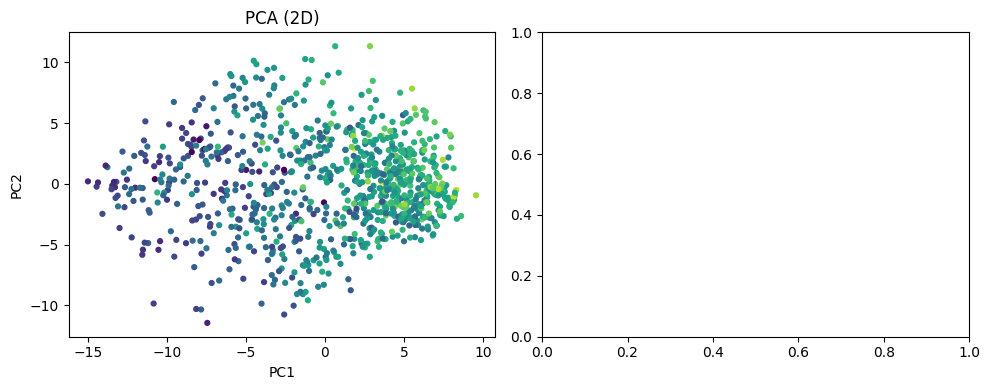

       pca1      pca2        y
0 -2.092989  1.016802  23954.0
1 -2.092989  1.016802  28268.0
2  0.276318  0.909393  24246.0
3  6.419326 -2.736875  29885.0
4  2.189697 -0.011299  24449.0


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from umap import UMAP

# --- separar features numéricas y target ---
y = df_train['y'].to_numpy()
X = df_train.drop(columns=['y']).select_dtypes(include='number')

# por si quedó algún NaN
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True))

# --- escalar ---
Xs = StandardScaler().fit_transform(X)

# --- PCA 2D ---
pca_2d = PCA(n_components=2, random_state=0).fit_transform(Xs)

# --- UMAP 2D (parámetros básicos y estables) ---
#umap_2d = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=0).fit_transform(Xs)

# --- DataFrame con embeddings y target (opcional para guardar/analizar) ---
embeds = pd.DataFrame({
    'pca1': pca_2d[:,0], 'pca2': pca_2d[:,1],
    #'umap1': umap_2d[:,0], 'umap2': umap_2d[:,1],
    'y': y
})

# --- plots simples ---
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sc1 = axes[0].scatter(embeds['pca1'], embeds['pca2'], c=embeds['y'], s=12)
axes[0].set_title('PCA (2D)'); axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')

#sc2 = axes[1].scatter(embeds['umap1'], embeds['umap2'], c=embeds['y'], s=12)
#axes[1].set_title('UMAP (2D)'); axes[1].set_xlabel('UMAP1'); axes[1].set_ylabel('UMAP2')

#cbar = fig.colorbar(sc2, ax=axes.ravel().tolist(), shrink=0.8)
#cbar.set_label('y')

plt.tight_layout()
plt.show()

# Si querés ver las primeras filas:
print(embeds.head())

##  Análisis Temporal

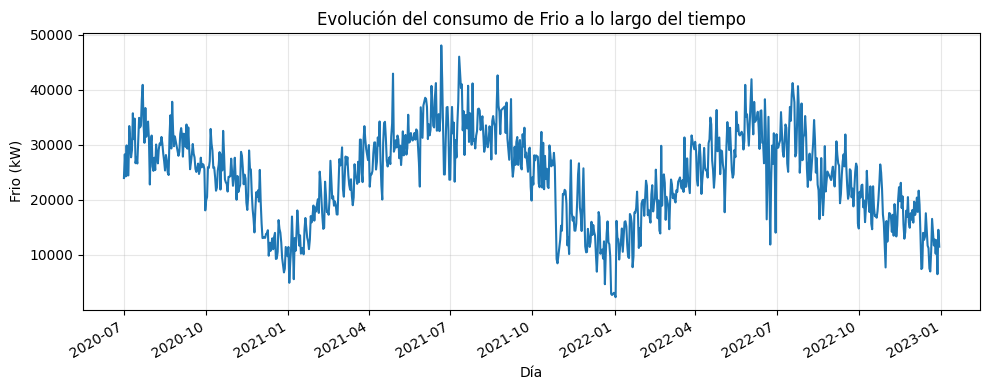

In [23]:
# Copia y limpieza básica
evol = df_train.copy()

# Asegurar fecha válida (formato día/mes/año) y quedarnos con fecha sola
evol["dia"] = pd.to_datetime(evol["dia"], format="%Y-%m-%d", dayfirst=True, errors="coerce").dt.date

# Quitar filas problemáticas y ordenar
evol = evol.dropna(subset=["dia", "y"]).sort_values("dia")

# Si hay varias filas por día, tomar el total diario (máximo/último)
evol_dia = evol.groupby("dia", as_index=False)["y"].max()

# Graficar
plt.figure(figsize=(10,4))
plt.plot(evol_dia["dia"], evol_dia["y"])
plt.xlabel("Día"); plt.ylabel("Frio (kW)")
plt.title("Evolución del consumo de Frio a lo largo del tiempo")
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

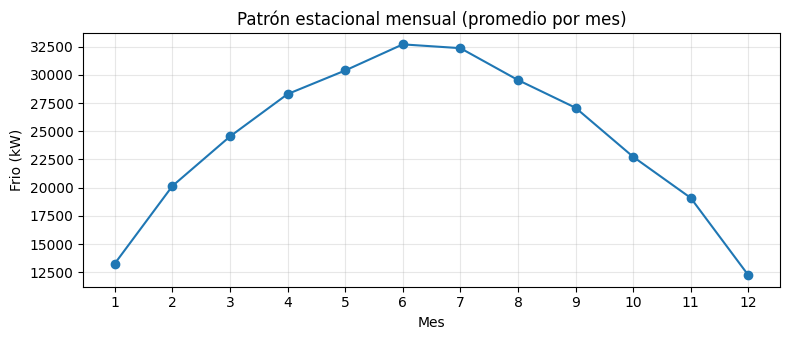

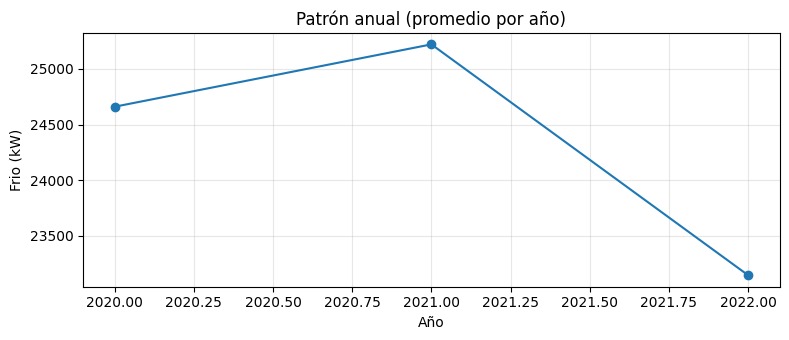

In [24]:
# --- preparar datos ---
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "y"]).sort_values("dia")
g["año"] = g["dia"].dt.year
g["mes"] = g["dia"].dt.month

# --- estacionalidad mensual (promedio por mes, agregando todas las años) ---
mensual = g.groupby("mes")["y"].mean()

plt.figure(figsize=(8,3.5))
plt.plot(mensual.index, mensual.values, marker="o")
plt.xticks(range(1,13))
plt.xlabel("Mes"); plt.ylabel("Frio (kW)")
plt.title("Patrón estacional mensual (promedio por mes)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- patrón anual (promedio por año) ---
anual = g.groupby("año")["y"].mean()

plt.figure(figsize=(8,3.5))
plt.plot(anual.index, anual.values, marker="o")
plt.xlabel("Año"); plt.ylabel("Frio (kW)")
plt.title("Patrón anual (promedio por año)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

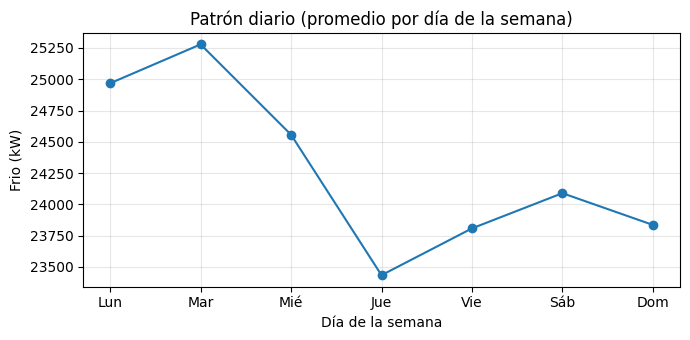

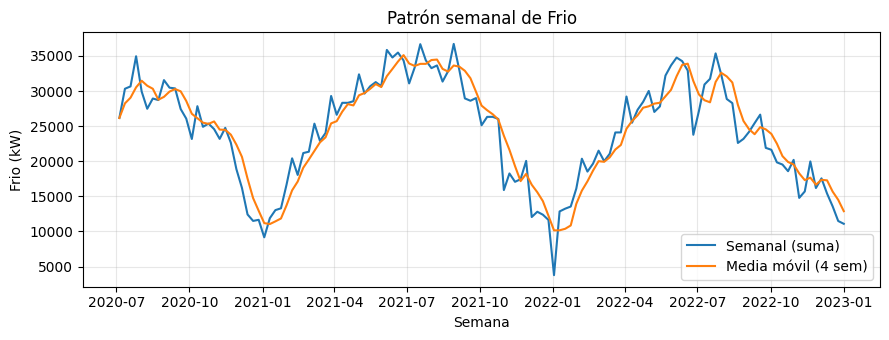

In [25]:
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "y"]).sort_values("dia")

# -----------------------
# Patrón DIARIO (por día de la semana)
# -----------------------
nombres_dow = {0:"Lun", 1:"Mar", 2:"Mié", 3:"Jue", 4:"Vie", 5:"Sáb", 6:"Dom"}
g["dow"] = g["dia"].dt.dayofweek
diario = g.groupby("dow")["y"].mean().reindex(range(7))

plt.figure(figsize=(7,3.5))
plt.plot([nombres_dow[d] for d in diario.index], diario.values, marker="o")
plt.xlabel("Día de la semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón diario (promedio por día de la semana)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# (opcional rápido: variabilidad por día de la semana)
# g.boxplot(column="Frio", by="dow", figsize=(8,4))
# plt.suptitle(""); plt.title("Distribución de Frio por día de la semana")
# plt.xlabel("Día de la semana (0=Lun..6=Dom)"); plt.ylabel("Frio (kW)")
# plt.tight_layout(); plt.show()

# -----------------------
# Patrón SEMANAL
# -----------------------
# Reindexar por fecha para resamplear
g = g.set_index("dia")

# Consumo semanal (suma por semana) + media móvil para suavizar
semanal = g["y"].resample("W").mean()
suavizada = semanal.rolling(4, min_periods=1).mean()  # ~promedio de 4 semanas

plt.figure(figsize=(9,3.5))
plt.plot(semanal.index, semanal.values, label="Semanal (suma)")
plt.plot(suavizada.index, suavizada.values, label="Media móvil (4 sem)")
plt.xlabel("Semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón semanal de Frio")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia","y"]).sort_values("dia")

# Día de la semana (0=Lun..6=Dom)
g["dow"] = g["dia"].dt.dayofweek

pearson = g["dow"].corr(g["y"])
print("Pearson(dow, y):", round(float(pearson), 4))

Pearson(dow, y): -0.0574


In [27]:
# preparar datos
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "y"])
g["dow"] = g["dia"].dt.dayofweek  # 0=Lun..6=Dom
nombres = {0:"Lun",1:"Mar",2:"Mié",3:"Jue",4:"Vie",5:"Sáb",6:"Dom"}

# eta² (ANOVA)
y = g["y"].values
y_mean = y.mean()
ss_total = ((y - y_mean)**2).sum()

ss_between = 0.0
for d in range(7):
    yi = g.loc[g["dow"]==d, "y"].values
    if len(yi) == 0: 
        continue
    ss_between += len(yi) * (yi.mean() - y_mean)**2

eta2 = ss_between / ss_total if ss_total > 0 else np.nan
print("Eta²(día_semana → y):", round(float(eta2), 4))

# resumen por día para interpretar
print("\nPromedio por día:")
print(g.groupby("dow")["y"].mean().rename(index=nombres).round(2))

Eta²(día_semana → y): 0.0059

Promedio por día:
dow
Lun    24968.14
Mar    25278.90
Mié    24556.49
Jue    23433.60
Vie    23807.75
Sáb    24089.16
Dom    23835.41
Name: y, dtype: float64


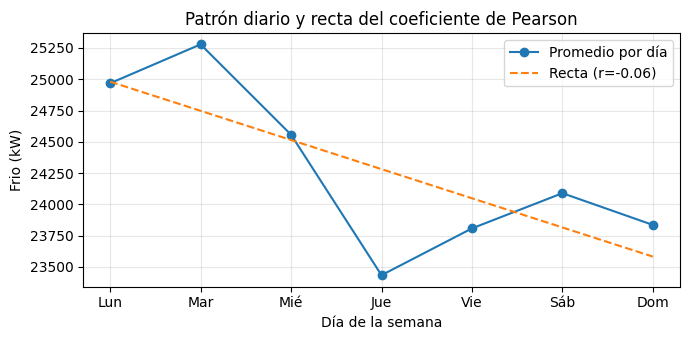

In [28]:
# Serie de promedios por día (ya la tenés como 'diario')
x = diario.index.values.astype(float)       # 0..6
y = diario.values

# Ajuste lineal y Pearson (r) con datos diarios crudos
m, b = np.polyfit(x, y, 1)
r = g["dow"].corr(g["y"])  # correlación Pearson día-de-semana vs Frio (datos diarios)

# Plot con recta
plt.figure(figsize=(7,3.5))
plt.plot(x, y, marker="o", label="Promedio por día")
plt.plot(x, m*x + b, linestyle="--", label=f"Recta (r={r:.2f})")
plt.xticks(x, [nombres_dow[int(d)] for d in x])
plt.xlabel("Día de la semana"); plt.ylabel("Frio (kW)")
plt.title("Patrón diario y recta del coeficiente de Pearson")
plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout()
plt.show()

## Análisis de Correlaciones

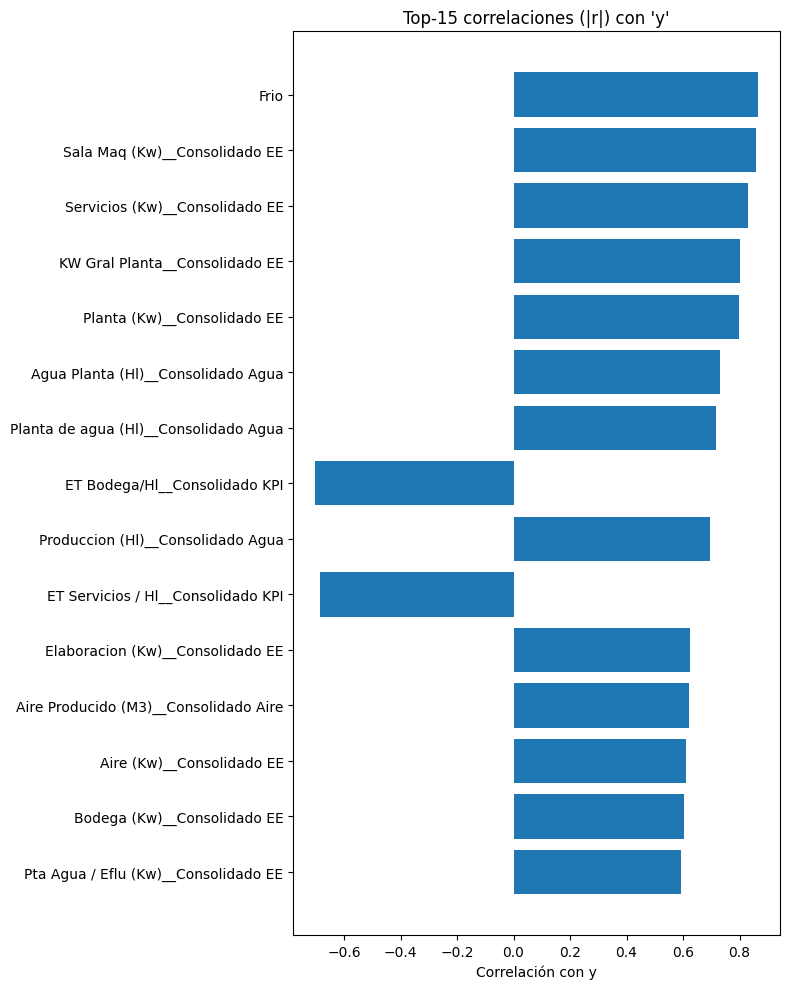

In [29]:
# (opcional) si tenés seaborn, activá este bloque para mejor visualización
try:
    import seaborn as sns
    HAS_SNS = True
except Exception:
    HAS_SNS = False

# --- preparar numéricas ---
g = df_train.copy()
num = g.select_dtypes(include=["number"])  # solo columnas numéricas
corr = num.corr(method="pearson")

# ---------------------------
# 1) Top-30 correlaciones con 'y'
# ---------------------------
if "y" in corr.columns:
    cor_frio = corr["y"].drop("y").sort_values(key=np.abs, ascending=False).head(15)

    plt.figure(figsize=(8, 10))
    plt.barh(cor_frio.index[::-1], cor_frio.values[::-1])
    plt.xlabel("Correlación con y")
    plt.title("Top-15 correlaciones (|r|) con 'y'")
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No se encontró la columna 'y' entre las numéricas.")

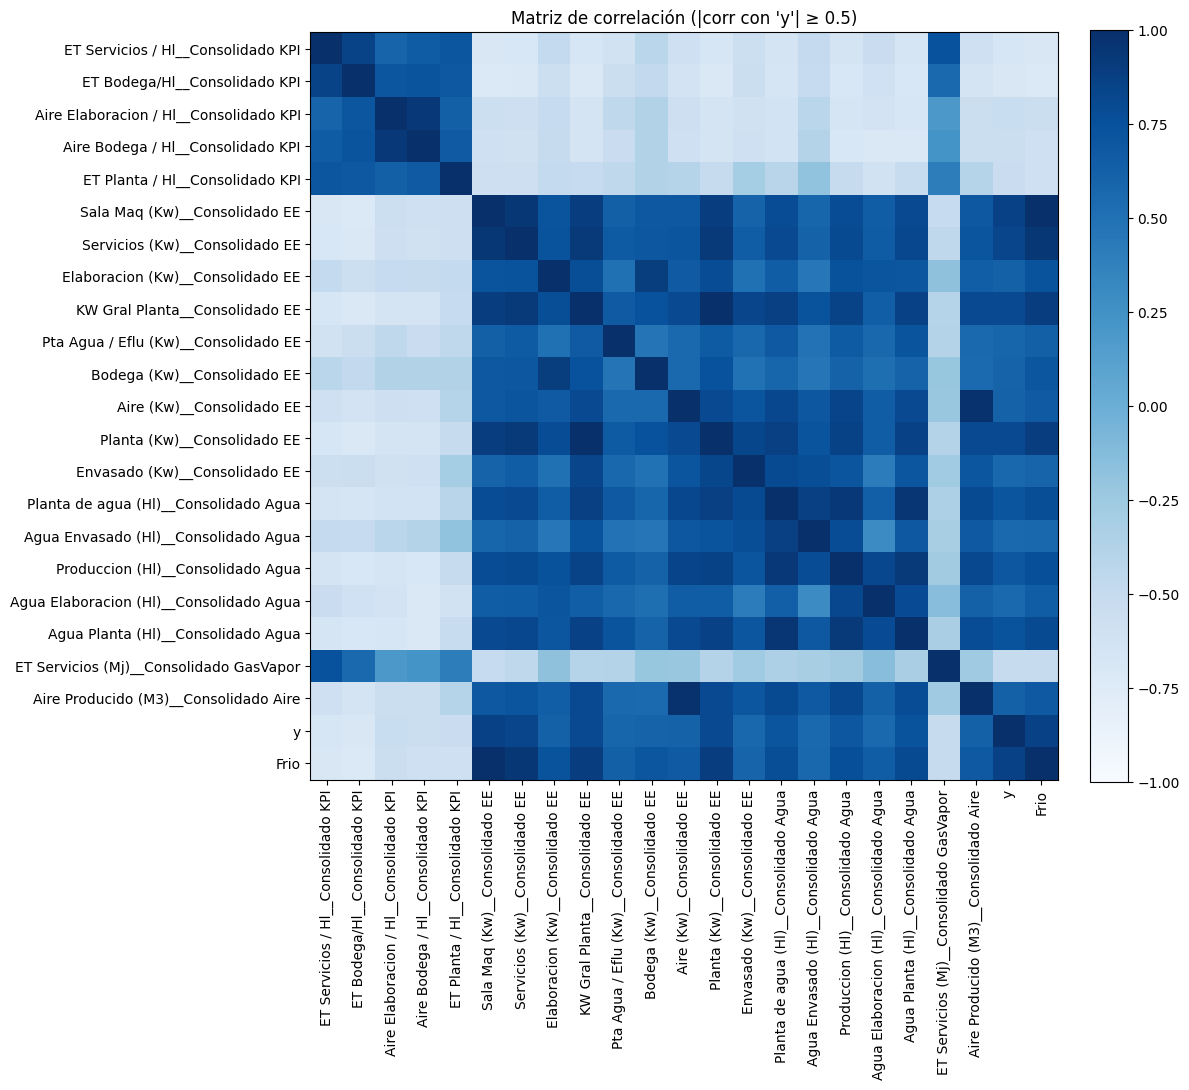

In [30]:
# --- parámetro: umbral de correlación absoluta con 'Frio' ---
UMBRAL = 0.50  # cambiá este valor

# --- preparar numéricas ---
g = df_train.copy()
num = g.select_dtypes(include="number").copy()

# seguridad: descartar columnas constantes (std=0) que rompen la correlación
const_cols = num.columns[num.std(numeric_only=True) == 0]
num = num.drop(columns=const_cols, errors="ignore")

# correlaciones absolutas
corr_abs = num.corr(method="pearson").abs()

if "y" not in corr_abs.columns:
    raise ValueError("No se encontró la columna numérica 'y' para filtrar por umbral.")

# columnas cuyo |corr con y| >= UMBRAL (incluye a 'y')
cols = corr_abs.index[corr_abs["y"] >= UMBRAL].tolist()

if len(cols) < 2:
    print(f"No hay suficientes variables con |corr| >= {UMBRAL}.")
else:
    subcorr = num[cols].corr(method="pearson")

    # --- plot legible ---
    n = len(cols)
    fig_w = min(12, 0.4 * n + 3)  # tamaño dinámico
    fig_h = min(12, 0.4 * n + 3)

    plt.figure(figsize=(fig_w, fig_h))
    im = plt.imshow(subcorr.values, vmin=-1, vmax=1, cmap="Blues")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(n), cols, rotation=90)
    plt.yticks(range(n), cols)
    plt.title(f"Matriz de correlación (|corr con 'y'| ≥ {UMBRAL})")
    plt.tight_layout()
    plt.show()

In [31]:
# --- 0) Preparar predictores numéricos (sin el target) ---
target = "y"
X = df_train.select_dtypes("number").drop(columns=[target], errors="ignore").copy()

# quitar columnas constantes o casi constantes (evita VIF infinito)
const_cols = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
X = X.drop(columns=const_cols)

# opcional: reemplazar inf y dropear filas totalmente NA
X = X.replace([np.inf, -np.inf], np.nan)

# --- 1) Correlación entre predictores ---
corr_pred = X.corr()

# Pares de predictores con |corr| alta (e.g., > 0.9)
thr = 0.90
mask = np.triu(np.ones_like(corr_pred, dtype=bool), k=1)
corr_pairs = (
    corr_pred.where(mask)
    .stack()
    .rename("corr")
    .reindex(corr_pred.columns, level=0)
    .reindex(corr_pred.columns, level=1)
    .reset_index()
    .rename(columns={"level_0": "feat_1", "level_1": "feat_2"})
)
altos = corr_pairs[np.abs(corr_pairs["corr"]) >= thr].sort_values(by="corr", key=np.abs, ascending=False)

print("=== Columnas constantes eliminadas ===")
print(const_cols)
print("\n=== Pares de predictores con |corr| >= {:.2f} ===".format(thr))
print(altos.head(50))  # muestra los 50 más fuertes



=== Columnas constantes eliminadas ===
[]

=== Pares de predictores con |corr| >= 0.90 ===
                                            feat_1  \
6092     Vapor Servicio (Kg)__Consolidado GasVapor   
1303         Produccion Agua / Hl__Consolidado KPI   
5016                KW Gral Planta__Consolidado EE   
4787                 Sala Maq (Kw)__Consolidado EE   
6120       Vapor Cocina (Kg)__Consolidado GasVapor   
3131             Aire Planta / Hl__Consolidado KPI   
5307                     Aire (Kw)__Consolidado EE   
5746         Planta de agua (Hl)__Consolidado Agua   
4722                  Linea 3 (Kw)__Consolidado EE   
4844                Servicios (Kw)__Consolidado EE   
4730                 Sala Maq (Kw)__Consolidado EE   
2808                 EE Frio / Hl__Consolidado KPI   
2882        Aire Elaboracion / Hl__Consolidado KPI   
5741         Planta de agua (Hl)__Consolidado Agua   
5884             Produccion (Hl)__Consolidado Agua   
4791                Servicios (Kw)__Consolida

## Visualizaciones Requeridas

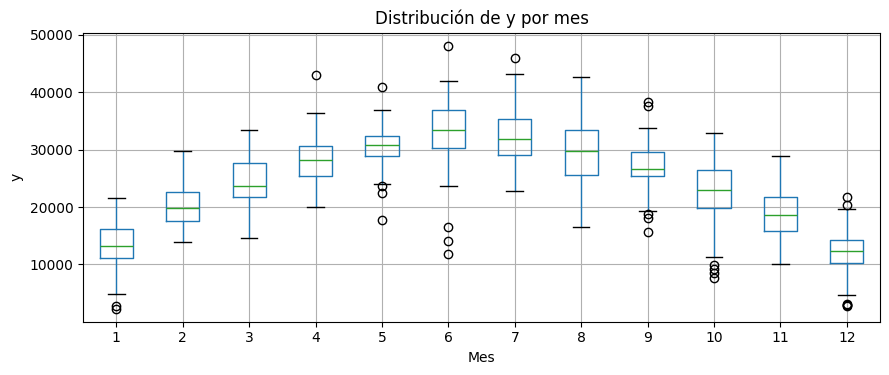

In [32]:
# --- preparar datos ---
g = df_train.copy()
g["dia"] = pd.to_datetime(g["dia"], format="%Y-%m-%d", errors="coerce")
g = g.dropna(subset=["dia", "y"]).sort_values("dia")
g["año"] = g["dia"].dt.year
g["mes"] = g["dia"].dt.month

g.boxplot(column="y", by="mes", figsize=(9,4))
plt.suptitle(""); plt.title("Distribución de y por mes"); plt.xlabel("Mes"); plt.ylabel("y")
plt.tight_layout()
plt.show()

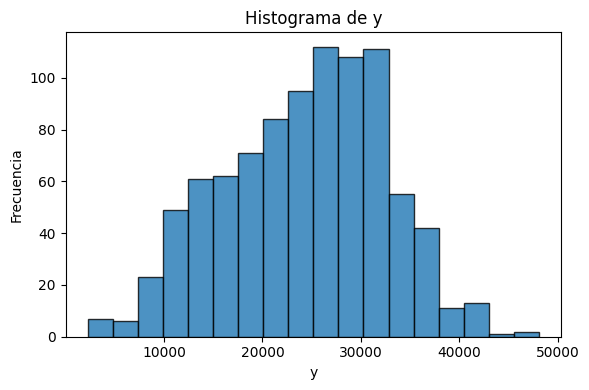

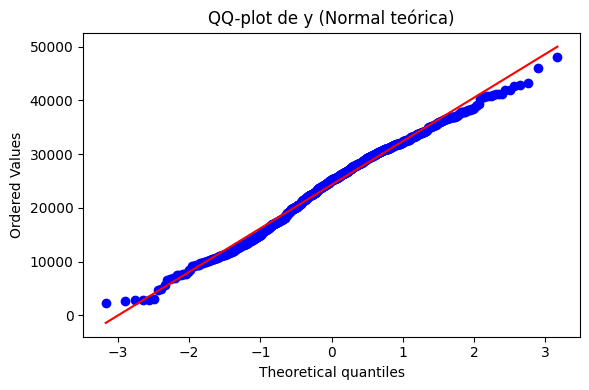

In [33]:
# --- Serie limpia ---
s = df_train["y"].replace([np.inf, -np.inf], np.nan).dropna()

# --- Histograma ---
plt.figure(figsize=(6,4))
plt.hist(s, bins="auto", edgecolor="k", alpha=0.8)
plt.xlabel("y")
plt.ylabel("Frecuencia")
plt.title("Histograma de y")
plt.tight_layout()
plt.show()

# --- QQ-plot (vs Normal) ---
plt.figure(figsize=(6,4))
stats.probplot(s, dist="norm", plot=plt)
plt.title("QQ-plot de y (Normal teórica)")
plt.tight_layout()
plt.show()

Top 6 por |corr| con 'y':
Frio                                  0.864926
Sala Maq (Kw)__Consolidado EE         0.859895
Servicios (Kw)__Consolidado EE        0.828361
KW Gral Planta__Consolidado EE        0.801714
Planta (Kw)__Consolidado EE           0.797916
Agua Planta (Hl)__Consolidado Agua    0.729171
dtype: float64


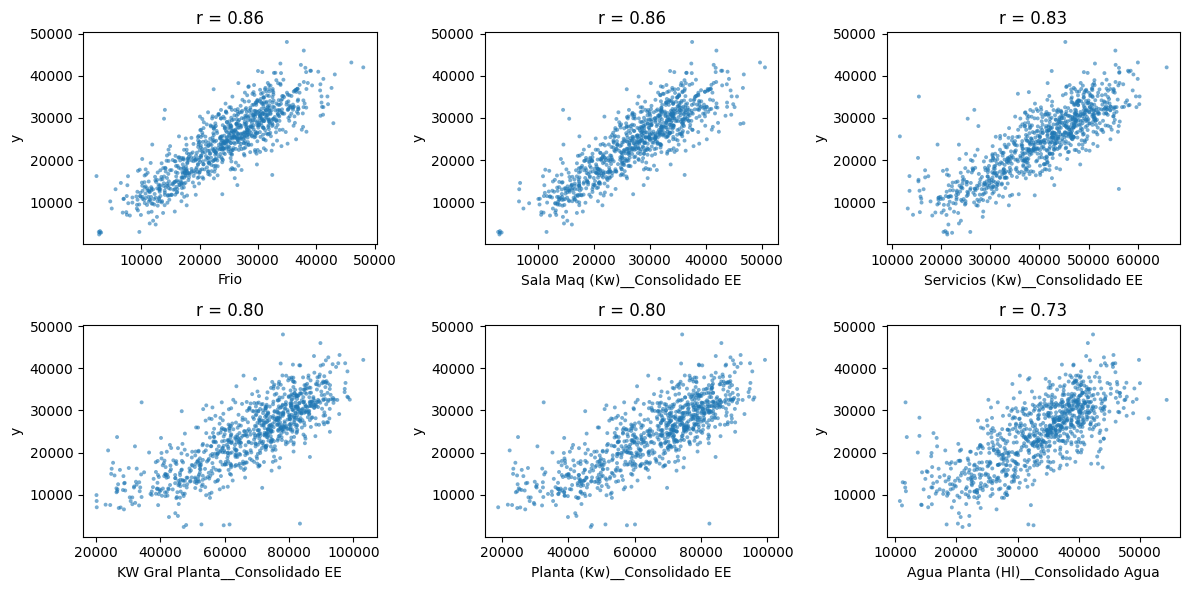

In [34]:
target = "y"
max_points = 5000  # ponelo en None para usar todos los puntos

# --- 1) Selección y ranking por correlación absoluta con "Frio" ---
num = df_train.select_dtypes("number").copy()
y = num[target].replace([np.inf, -np.inf], np.nan)

X = num.drop(columns=[target], errors="ignore").replace([np.inf, -np.inf], np.nan)

corrs = X.corrwith(y)                     # Pearson con signo
top5 = corrs.abs().sort_values(ascending=False).head(6).index.tolist()

print("Top 6 por |corr| con 'y':")
print(corrs.loc[top5].sort_values(key=np.abs, ascending=False))

# --- 2) Scatter plots en grilla 2x3 (5 plots + 1 vacío oculto) ---
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), squeeze=False)

for i, feat in enumerate(top5):
    ax = axes.flat[i]
    datos = pd.concat([X[feat], y], axis=1, keys=[feat, target]).dropna()
    if max_points is not None and len(datos) > max_points:
        datos = datos.sample(max_points, random_state=0)

    ax.scatter(datos[feat], datos[target], s=8, alpha=0.6, edgecolors="none")
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.set_title(f"r = {corrs[feat]:.2f}")

# ocultar el subplot sobrante (si lo hay)
for j in range(len(top5), rows*cols):
    axes.flat[j].axis("off")

plt.tight_layout()
plt.show()

=== Consumo (asignación proxy) de Frio por área ===
              Frio_total  %_del_total
Servicios    12414241.63        56.00
Envasado      5078350.79        22.91
Elaboración   2995213.33        13.51
Bodega        1299818.61         5.86
Sala Maq       380202.16         1.72


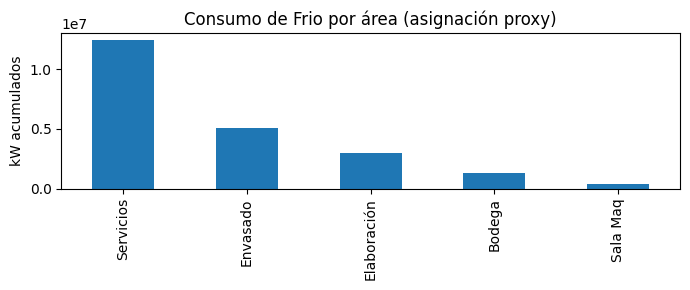

C:\Users\angim\AppData\Local\Temp\ipykernel_9412\734507827.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  area_frio.resample("M").sum().plot(figsize=(9,4), alpha=0.85)


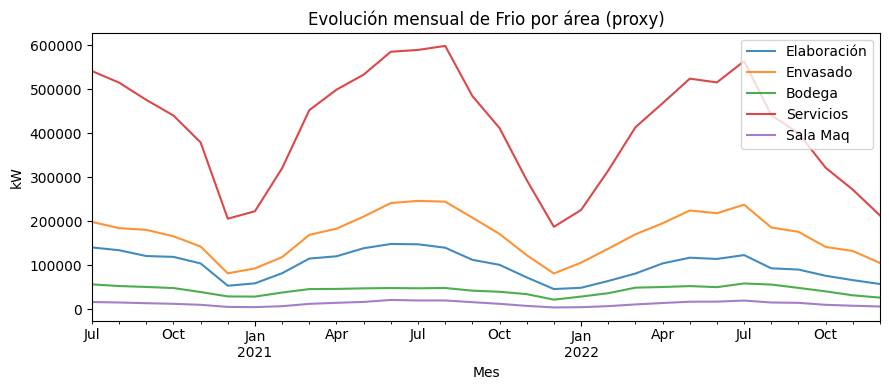

In [35]:
# --- 0) Usar tu DF ya cargado ---
df = df_train.copy() 

# --- 1) Columna de Frio (elige la que tengas) ---
FRIO_CANDIDATAS = ["y"]
FRIO_COL = next((c for c in FRIO_CANDIDATAS if c in df.columns), None)
assert FRIO_COL is not None, "No encuentro la columna de 'y'."

# --- 2) Patrones por área (ajustá si hace falta) ---
AREAS = {
    "Elaboración": r"Elab|Elabor|Coci|Cocina|Mosto|Lauter|Macer|Paste",
    "Envasado":    r"Envas|Llen|Linea|L[2345]\b",
    "Bodega":      r"Bodega|Bodeg",
    "Servicios":   r"Servicios|Vapor|Gas|Agua|Aire|Caldera|Compres|Chiller|Sala",
    "Sala Maq":    r"Sala.*Maq",
}
# columnas a excluir del proxy (metas, columnas sin nombre, y ratios por Hl KPI)
EXC = r"^(Meta|Unnamed)|/ Hl_Consolidado KPI|^\s*_"

# --- 3) Construir un "proxy de actividad" por área (min-max simple) ---
num = df.select_dtypes("number").drop(columns=[FRIO_COL], errors="ignore")
cols_validas = [c for c in num.columns if not re.search(EXC, c, flags=re.I)]
norm = (num[cols_validas] - num[cols_validas].min()) / (num[cols_validas].max() - num[cols_validas].min())
norm = norm.replace([np.inf, -np.inf], np.nan)

cols_area = {area: [c for c in norm.columns if re.search(pat, c, flags=re.I)] for area, pat in AREAS.items()}
proxy = pd.DataFrame({area: norm[cols].sum(axis=1) if cols else 0.0 for area, cols in cols_area.items()}).fillna(0)

# --- 4) Repartir el Frio total según pesos (proxy normalizado por fila) ---
w = proxy.clip(lower=0)
w = w.div(w.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
area_frio = w.mul(df[FRIO_COL].values, axis=0)

# --- 5) Resumen y gráficos ---
resumen = area_frio.sum().to_frame("Frio_total")
resumen["%_del_total"] = 100 * resumen["Frio_total"] / resumen["Frio_total"].sum()
print("=== Consumo (asignación proxy) de Frio por área ===")
print(resumen.sort_values("Frio_total", ascending=False).round(2))

resumen["Frio_total"].sort_values(ascending=False).plot(kind="bar", figsize=(7,3))
plt.title("Consumo de Frio por área (asignación proxy)")
plt.ylabel("kW acumulados"); plt.xlabel("")
plt.tight_layout(); plt.show()

# Evolución mensual por área (si hay columna de fecha)
if "dia" in df.columns:
    idx = pd.to_datetime(df["dia"], errors="coerce", dayfirst=True)
    area_frio.index = idx
    area_frio.resample("M").sum().plot(figsize=(9,4), alpha=0.85)
    plt.title("Evolución mensual de Frio por área (proxy)")
    plt.ylabel("kW"); plt.xlabel("Mes")
    plt.tight_layout(); plt.show()

## df para prrprocesamiento

In [37]:
df_train.to_csv(os.path.join("..", "data", "dataset_preprocesamiento_train.csv"))
df_test.to_csv(os.path.join("..", "data", "dataset_preprocesamiento_test.csv"))

In [38]:
# scripts/lineage.py
from __future__ import annotations
import json, os, socket, getpass, subprocess, sys
from datetime import datetime
from pathlib import Path
from typing import Any, Dict, List, Optional

LINEAGE_PATH = Path("data/processed/data_lineage.json")

def _git(cmd: List[str]) -> Optional[str]:
    try:
        out = subprocess.check_output(["git"] + cmd, stderr=subprocess.DEVNULL).decode().strip()
        return out or None
    except Exception:
        return None

def _git_info() -> Dict[str, Any]:
    return {
        "branch": _git(["rev-parse", "--abbrev-ref", "HEAD"]),
        "commit": _git(["rev-parse", "HEAD"]),
        "dirty": bool(_git(["status", "--porcelain"])),
        "remote": _git(["config", "--get", "remote.origin.url"]),
    }

def _ensure_file():
    LINEAGE_PATH.parent.mkdir(parents=True, exist_ok=True)
    if not LINEAGE_PATH.exists():
        LINEAGE_PATH.write_text("[]", encoding="utf-8")

def log_lineage(
    step: str,
    inputs: List[str] | None = None,
    outputs: List[str] | None = None,
    params: Dict[str, Any] | None = None,
    notes: str | None = None,
    script_path: Optional[str] = None
) -> None:
    """
    Agrega una entrada de linaje.
    - step: nombre corto de la transformación (ej: 'imputacion_iqr')
    - inputs/outputs: rutas relativas de archivos usados/generados
    - params: hiperparámetros/config usada
    - notes: comentario libre
    """
    _ensure_file()
    try:
        data = json.loads(LINEAGE_PATH.read_text(encoding="utf-8"))
    except json.JSONDecodeError:
        data = []  # si se dañó, lo rearmamos

    # inferir script
    script = script_path or (sys.argv[0] if sys.argv else None)

    entry = {
        "timestamp": datetime.now().isoformat(timespec="seconds"),
        "user": getpass.getuser(),
        "host": socket.gethostname(),
        "script": script,
        "step": step,
        "inputs": inputs or [],
        "outputs": outputs or [],
        "params": params or {},
        "notes": notes,
        "git": _git_info(),
        "python": {
            "version": sys.version.split()[0],
        },
    }
    data.append(entry)
    LINEAGE_PATH.write_text(json.dumps(data, indent=2, ensure_ascii=False), encoding="utf-8")